Github: https://github.com/lhedya/Feature-Importance-Analysis-Model-Interpretation

# Install and Load Package

In [ ]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install dalex scikit-plot shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.3 MB/s  0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dalex: filename=dalex-1.7.2-py3-none-any.whl size=1043001 sha256=c2b3fdb68443f39d9d7d03d94bafb6893052abd7d1b8c44031fa5ba9d794c526
  Stored in directory: /root/.cache/pip/wheels/17/0a/3a/8c988bdca6acd7ce4aa949726b26c382ad1635e065bf83a175
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283913 sha256=39cfc01498e2883256555b91908b6756a4bc4b808b514f479d2aef025a3b47f2
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built dalex lime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [dalex]


- Dalex: Digunakan untuk analisis model explainability secara agnostik. Yang memungkinkan untuk mengeksplorasi perilaku model kompleks (seperti Random Forest) dan memahami bagaimana fitur-fitur secara keseluruhan memengaruhi keputusan churn. penting untuk mendapatkan wawasan global tentang faktor-faktor churn.
- scikit-plot: Memfasilitasi visualisasi metrik evaluasi model. Menggunakannya untuk menghasilkan plot seperti kurva Precision-Recall, yang sangat relevan dalam kasus data yang tidak seimbang (seperti data churn) untuk menilai performa model secara lebih akurat dalam mengidentifikasi pelanggan yang churn.
- shap (SHapley Additive exPlanations): Diterapkan untuk interpretasi model secara lokal. SHAP membantu memahami kontribusi setiap fitur terhadap prediksi churn untuk setiap pelanggan individu. Ssangat berguna untuk mengidentifikasi alasan spesifik mengapa seorang pelanggan diprediksi akan churn, yang dapat menginformasikan strategi retensi yang ditargetkan.
- lime (Local Interpretable Model-agnostic Explanations): Juga digunakan untuk interpretasi lokal. LIME memberikan penjelasan yang mudah dipahami untuk prediksi individu dengan membuat model yang dapat diinterpretasikan di sekitar titik data yang spesifik. Ini melengkapi analisis SHAP dan memberikan perspektif lain tentang prediksi lokal.

Penggunaan kombinasi pustaka agar memungkinkan  untuk tidak hanya membangun model prediksi churn yang powerful tetapi juga untuk mendapatkan pemahaman yang mendalam tentang faktor-faktor pendorong churn dan menjelaskan hasil prediksi model secara transparan.

In [ ]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import decision tree model as surrogate model
from sklearn.tree import DecisionTreeClassifier
# import tree module
from sklearn import tree

# import xgboost classifier
from xgboost import XGBClassifier

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
# import scikitplot as skplt # Removed due to ImportError

# load shap package for shap explanation
import shap

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

file_path = '/content/drive/MyDrive/Data Analysis/bank_churn_data.csv'
df = pd.read_csv(file_path)
print("Data berhasil dibaca:")
display(df.head())

Data berhasil dibaca:


,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Data Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

- user_id: customer account number.
- attrition_flag: customer status (Existing and Attrited).
- customer_age: age of the customer.
- gender: gender of customer (M for male and F for female).
- dependent_count: number of dependents of customers.
- education_level: customer education level (Uneducated, High School, Graduate, College, Post-Graduate, Doctorate, and Unknown).
- marital_status: customer's marital status (Single, Married, Divorced, and Unknown).
- income_category: customer income interval category (Less than $40K, $40K-$60k, $60K-$80K, $80K-$120K, $120K +, and Unknown).
- card_category: type of card used (Blue, Silver, Gold, and Platinum).
- months_on_book: period of being a customer (in months).
- total_relationship_count: the number of products used by customers in the bank.
- months_inactive_12_mon: period of inactivity for the last 12 months.
- contacts_count_12_mon: the number of interactions between the bank and the customer in the last 12 months.
- credit_limit: credit card transaction nominal limit in one period.
- total_revolving_bal: total funds used in one period.
- avg_open_to_buy: the difference between the credit limit set for the cardholder's account and the current balance.
- total_amt_chng_q4_q1: increase in customer transaction nominal between quarter 4 and quarter 1.
- total_trans_amt: total nominal transaction in the last 12 months.
- total_trans_ct: the number of transactions in the last 12 months.
- total_ct_chng_q4_q1: the number of customer transactions increased between quarter 4 and quarter 1.
- avg_utilization_ratio: percentage of credit card usage.


In [ ]:
# check data dimension
df.shape

(10127, 21)

In [ ]:
df.isna().sum()

,0
user_id,0
attrition_flag,0
customer_age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
income_category,0
card_category,0
months_on_book,0


In [ ]:
# untuk melihat value kolom
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()


============= user_id =================


,count
user_id,
714337233,1
768805383,1
818770008,1
713982108,1
769911858,1
...,...
709327383,1
806160108,1
753327333,1



============= attrition_flag =================


,count
attrition_flag,
Existing Customer,8500
Attrited Customer,1627



============= customer_age =================


,count
customer_age,
44,500
49,495
46,490
45,486
47,479
43,473
48,472
50,452
42,426



============= gender =================


,count
gender,
F,5358
M,4769



============= dependent_count =================


,count
dependent_count,
3,2732
2,2655
1,1838
4,1574
0,904
5,424



============= education_level =================


,count
education_level,
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451



============= marital_status =================


,count
marital_status,
Married,4687
Single,3943
Unknown,749
Divorced,748



============= income_category =================


,count
income_category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727



============= card_category =================


,count
card_category,
Blue,9436
Silver,555
Gold,116
Platinum,20



============= months_on_book =================


,count
months_on_book,
36,2463
37,358
34,353
38,347
39,341
40,333
31,318
35,317
33,305



============= total_relationship_count =================


,count
total_relationship_count,
3,2305
4,1912
5,1891
6,1866
2,1243
1,910



============= months_inactive_12_mon =================


,count
months_inactive_12_mon,
3,3846
2,3282
1,2233
4,435
5,178
6,124
0,29



============= contacts_count_12_mon =================


,count
contacts_count_12_mon,
3,3380
2,3227
1,1499
4,1392
0,399
5,176
6,54



============= credit_limit =================


,count
credit_limit,
34516.0,508
1438.3,507
9959.0,18
15987.0,18
23981.0,12
...,...
20979.0,1
14470.0,1
13535.0,1



============= total_revolving_bal =================


,count
total_revolving_bal,
0,2470
2517,508
1480,12
1965,12
1434,11
...,...
1939,1
460,1
2197,1



============= avg_open_to_buy =================


,count
avg_open_to_buy,
1438.3,324
34516.0,98
31999.0,26
787.0,8
953.0,7
...,...
9007.0,1
16016.0,1
10946.0,1



============= total_amt_chng_q4_q1 =================


,count
total_amt_chng_q4_q1,
0.791,36
0.712,34
0.743,34
0.718,33
0.735,33
...,...
0.420,1
1.163,1
3.397,1



============= total_trans_amt =================


,count
total_trans_amt,
4509,11
4253,11
2229,10
4518,10
4313,9
...,...
10170,1
14638,1
8531,1



============= total_trans_ct =================


,count
total_trans_ct,
81,208
75,203
71,203
69,202
82,202
...,...
11,2
134,1
139,1



============= total_ct_chng_q4_q1 =================


,count
total_ct_chng_q4_q1,
0.667,171
1.000,166
0.500,161
0.750,156
0.600,113
...,...
0.772,1
0.922,1
0.948,1



============= avg_utilization_ratio =================


,count
avg_utilization_ratio,
0.000,2470
0.073,44
0.057,33
0.048,32
0.060,30
...,...
0.926,1
0.931,1
0.988,1


In [ ]:
# Identify columns containing 'Unknown'
unknown_columns = [col for col in df.columns if (df[col] == 'Unknown').any()]

print("Kolom yang mengandung nilai 'Unknown' dan jumlahnya:")
for col in unknown_columns:
    print(f"\n============= {col} =================")
    display(df[col].value_counts())

Kolom yang mengandung nilai 'Unknown' dan jumlahnya:

============= education_level =================


,count
education_level,
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451



============= marital_status =================


,count
marital_status,
Married,4687
Single,3943
Unknown,749
Divorced,748



============= income_category =================


,count
income_category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


In [ ]:
print("Jumlah total pelanggan (berdasarkan jumlah baris):")
print(df.shape[0])

print("\nJumlah total pelanggan (berdasarkan jumlah ID pengguna unik):")
print(df['user_id'].nunique())

Jumlah total pelanggan (berdasarkan jumlah baris):
10127

Jumlah total pelanggan (berdasarkan jumlah ID pengguna unik):
10127


# Eksplorasi Data

## Distribusi usia pelanggan

In [ ]:
df['customer_age'].value_counts()

,count
customer_age,
44,500
49,495
46,490
45,486
47,479
43,473
48,472
50,452
42,426


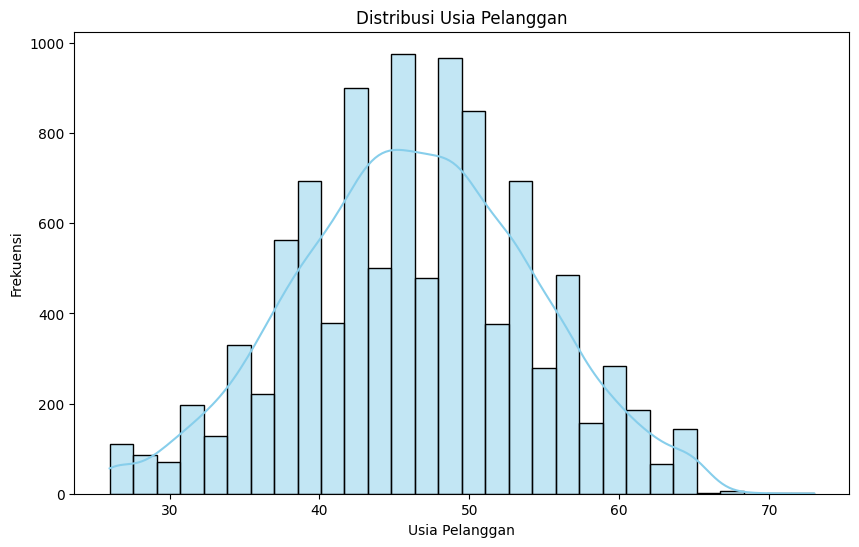

In [ ]:
# Analisis distribusi usia pelanggan
plt.figure(figsize=(10, 6))
sns.histplot(df['customer_age'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia Pelanggan')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
# Pengelompokan usia pelanggan
# Define age bins and labels
age_bins = [0, 25, 35, 45, 55, 65, df['customer_age'].max()]
age_labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']

# Membuat salinan dataFrame sebelum menambahkan kolom 'age_group'
df_copy = df.copy()

# Membuat column 'age_group' berdasarkan kelompok usia pada salinan DataFrame
df_copy['age_group'] = pd.cut(df_copy['customer_age'], bins=age_bins, labels=age_labels, right=False)

print("Data dengan kolom age_group:")
display(df_copy.head())

Data dengan kolom age_group:


,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,age_group
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,45-54
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,45-54
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,45-54
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,35-44
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,35-44


In [ ]:
# Menghitung pelanggan yang churn berdasarkan kelompok usia
churn_count_by_age_group = df_copy.groupby('age_group')['attrition_flag'].value_counts().unstack()

# Pilih hanya kolom ‘Attrited Customeri’ dan isi nilai NaN yang mungkin dengan 0.
churn_count_by_age_group = churn_count_by_age_group['Attrited Customer'].fillna(0).astype(int)

print("Jumlah Pelanggan yang Churn per Kelompok Usia:")
display(churn_count_by_age_group)


Jumlah Pelanggan yang Churn per Kelompok Usia:


/tmp/ipython-input-3748899661.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_count_by_age_group = df_copy.groupby('age_group')['attrition_flag'].value_counts().unstack()


,Attrited Customer
age_group,
<25,0
25-34,101
35-44,548
45-54,716
55-64,251
65+,11


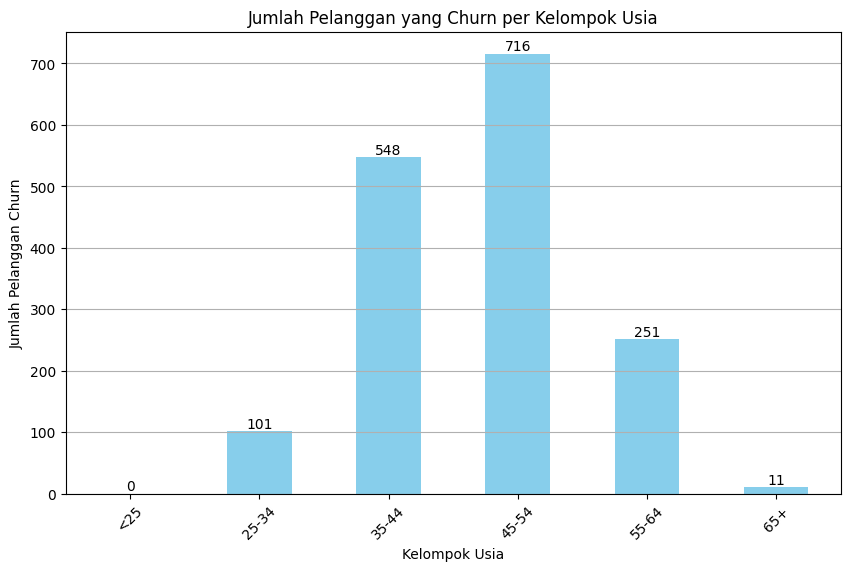

In [ ]:
# Visualisasi pelanggan churn by age
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ax = churn_count_by_age_group.plot(kind='bar', color='skyblue')

# Menambahkan label jumlah pada masing-masing batang
ax.bar_label(ax.containers[0])

plt.title('Jumlah Pelanggan yang Churn per Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Pelanggan Churn')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


## Hubungan antara tingkat pendidikan dan pendapatan

In [ ]:
# Grup data berdasarkan education level dan income category dan hitung attrition_flag
churn_by_education_income = df.groupby(['education_level', 'income_category'])['attrition_flag'].value_counts().unstack().fillna(0)

print("Jumlah Pelanggan (Churn dan Existing) per Tingkat Pendidikan dan Kategori Pendapatan:")
display(churn_by_education_income)

Jumlah Pelanggan (Churn dan Existing) per Tingkat Pendidikan dan Kategori Pendapatan:


attrition_flag                   Attrited Customer  Existing Customer
education_level income_category                                      
College         $120K +                         12                 58
                $40K - $60K                     24                159
                $60K - $80K                     17                115
                $80K - $120K                    36                139
                Less than $40K                  49                296
                Unknown                         16                 92
Doctorate       $120K +                          8                 29
                $40K - $60K                     11                 59
                $60K - $80K                      7                 52
                $80K - $120K                    11                 46
                Less than $40K                  42                116
                Unknown                         16                 54
Graduate        $120K +                         32                172
                $40K - $60K                     77                476
                $60K - $80K                     52                370
                $80K - $120K                    67                411
                Less than $40K                 210                929
                Unknown                         49                283
High School     $120K +                         28                119
                $40K - $60K                     51                304
                $60K - $80K                     42                265
                $80K - $120K                    41                267
                Less than $40K                 101                570
                Unknown                         43                182
Post-Graduate   $120K +                          4                 26
                $40K - $60K                     17                 94
                $60K - $80K                     16                 61
                $80K - $120K                    17                 64
                Less than $40K                  34                136
                Unknown                          4                 43
Uneducated      $120K +                         23                 96
                $40K - $60K                     41                208
                $60K - $80K                     24                171
                $80K - $120K                    37                180
                Less than $40K                  80                442
                Unknown                         32                153
Unknown         $120K +                         19                101
                $40K - $60K                     50                219
                $60K - $80K                     31                179
                $80K - $120K                    33                186
                Less than $40K                  96                460
                Unknown                         27                118

In [ ]:
# Menghutung tingkat churn untuk setiap kelompok
churn_rate_by_education_income = churn_by_education_income['Attrited Customer'] / (churn_by_education_income['Attrited Customer'] + churn_by_education_income['Existing Customer'])

print("\nChurn Rate per Tingkat Pendidikan dan Kategori Pendapatan:")
display(churn_rate_by_education_income.unstack())


Churn Rate per Tingkat Pendidikan dan Kategori Pendapatan:


income_category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
education_level,,,,,,
College,0.171429,0.131148,0.128788,0.205714,0.142029,0.148148
Doctorate,0.216216,0.157143,0.118644,0.192982,0.265823,0.228571
Graduate,0.156863,0.139241,0.123223,0.140167,0.184372,0.147590
High School,0.190476,0.143662,0.136808,0.133117,0.150522,0.191111
Post-Graduate,0.133333,0.153153,0.207792,0.209877,0.200000,0.085106
Uneducated,0.193277,0.164659,0.123077,0.170507,0.153257,0.172973
Unknown,0.158333,0.185874,0.147619,0.150685,0.172662,0.186207


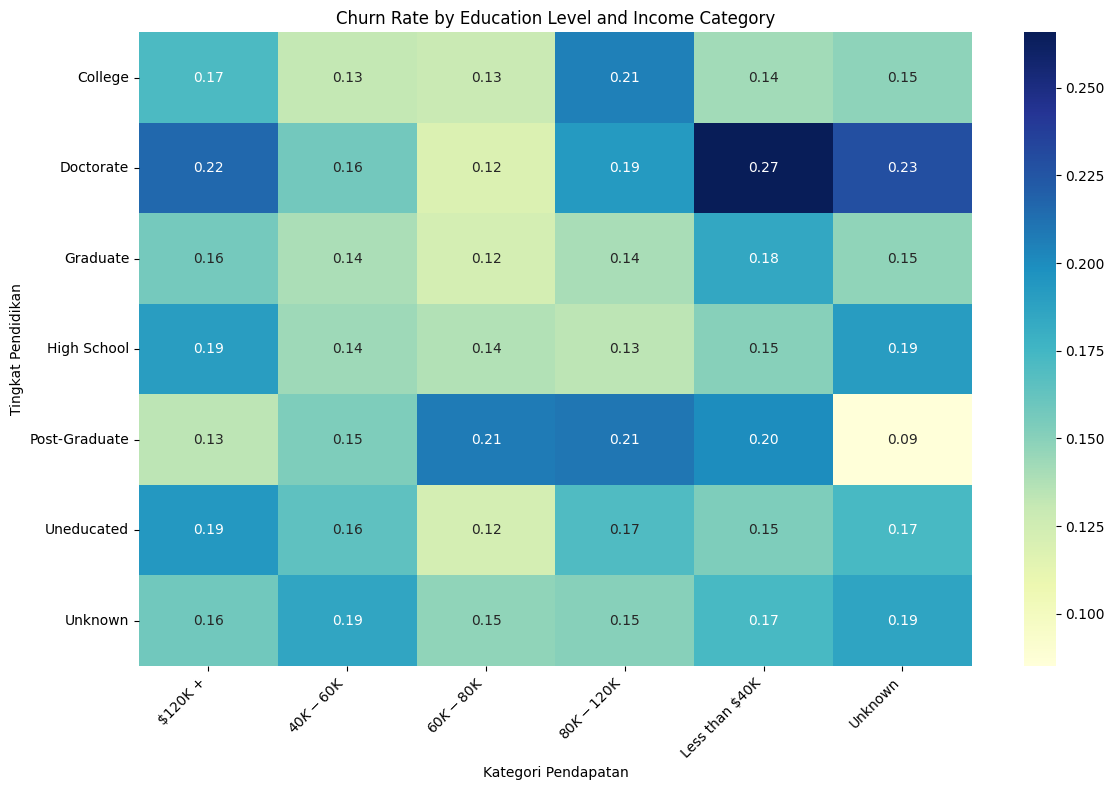

In [ ]:
# Visualisasi churn rate by education level and income category
plt.figure(figsize=(12, 8))
sns.heatmap(churn_rate_by_education_income.unstack(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Churn Rate by Education Level and Income Category')
plt.xlabel('Kategori Pendapatan')
plt.ylabel('Tingkat Pendidikan')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Insight:<br>
Tingkat pendidikan
- Pelanggan dengan pendidikan Doctorate menunjukkan churn rate tertinggi (warna lebih gelap), terutama pada kategori pendapatan less than 40k dolar, unknown dan 120k+ dolar.
- Dan pada post-graduate juga memiliki churn rate yang tinggi pada beberapa kategori pendapatan dibandingkan tingkat lain.

Kategori Pendapatan:
- Pelanggan dengan kategori pendapatan "Less than 40K" dan "Unknown" memiliki churn rate yang lebih tinggi secara konsisten di sebagian besar tingkat pendidikan. Sebaliknya, pelanggan dengan kategori pendapatan "$$40K" dan "Unknown" memiliki churn rate yang lebih tinggi secara konsisten di sebagian besar tingkat pendidikan. Sebaliknya, pelanggan dengan kategori pendapatan "$120K +" cenderung memiliki churn rate yang lebih rendah.

Kombinasi:
- kombinasi tingkat pendidikan dan kategori pendapatan yang memiliki churn rate lebih tinggi, seperti "Doctorate" dengan "Less than 40K", "Post-Graduate" dengan "40K", "Post-Graduate" dengan "60K - 80K" dan "80K" dan "80K - 120K", serta "Unknown" dengan "Less than 120K", serta "Unknown" dengan "Less than 40K". Ini menunjukkan bahwa faktor pendidikan dan pendapatan secara bersamaan dapat mempengaruhi kecenderungan churn.

## Churn Berdasarkan Gender

In [ ]:
# Hitung jumlah pelanggan churn dan existing berdasarkan gender
churn_by_gender = df.groupby('gender')['attrition_flag'].value_counts().unstack().fillna(0)

print("Jumlah Pelanggan (Churn dan Existing) per Gender:")
display(churn_by_gender)

Jumlah Pelanggan (Churn dan Existing) per Gender:


attrition_flag,Attrited Customer,Existing Customer
gender,,
F,930,4428
M,697,4072


In [ ]:
# Hitung churn rate berdasarkan gender
churn_rate_by_gender = churn_by_gender['Attrited Customer'] / (churn_by_gender['Attrited Customer'] + churn_by_gender['Existing Customer'])

print("\nChurn Rate per Gender:")
display(churn_rate_by_gender)


Churn Rate per Gender:


,0
gender,
F,0.173572
M,0.146152


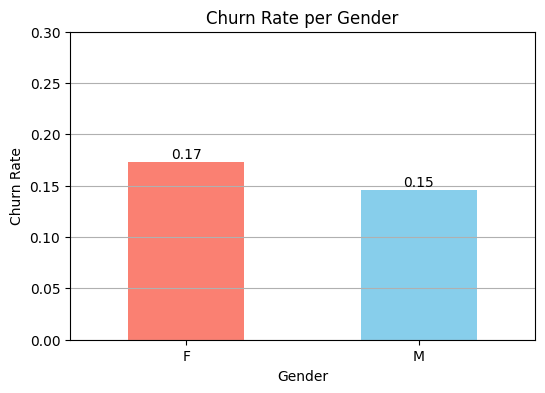

In [ ]:
# Visualisasi churn rate berdasarkan gender
plt.figure(figsize=(6, 4))
ax = churn_rate_by_gender.plot(kind='bar', color=['salmon', 'skyblue'])

# Menambahkan label persentase pada masing-masing batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Churn Rate per Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.ylim(0, 0.3) # Set y-axis limit for better visualization
plt.grid(axis='y')

plt.show()

Berdasarkan analisis data dan visualisasi yang sudah dilakukan, ditemukan bahwa pelanggan wanita (F) memiliki churn rate sekitar 17.36%, sedangkan pelanggan laki-laki (M) memiliki churn rate sekitar 14.62%. Ini menunjukkan bahwa pelanggan wanita cenderung memiliki kemungkinan churn yang sedikit lebih tinggi dibandingkan dengan pelanggan laki-laki dalam dataset ini. Meskipun perbedaannya sekitar 2.74%, dalam skala besar bank, perbedaan ini bisa dianggap signifikan dan perlu diperhatikan dalam strategi retensi.

## Churn Rate by Months on Book

In [ ]:
# Menjumlahkan churn rate berdasarkan months_on_book
churn_by_months_on_book = df.groupby('months_on_book')['attrition_flag'].value_counts().unstack().fillna(0)

# Manjumlahkan churn rate
churn_by_months_on_book['Churn Rate'] = churn_by_months_on_book['Attrited Customer'] / (churn_by_months_on_book['Attrited Customer'] + churn_by_months_on_book['Existing Customer'])

print("Churn Rate by Months on Book:")
display(churn_by_months_on_book[['Attrited Customer', 'Existing Customer', 'Churn Rate']].head())

Churn Rate by Months on Book:


attrition_flag,Attrited Customer,Existing Customer,Churn Rate
months_on_book,,,
13,7,63,0.100000
14,1,15,0.062500
15,9,25,0.264706
16,3,26,0.103448
17,4,35,0.102564


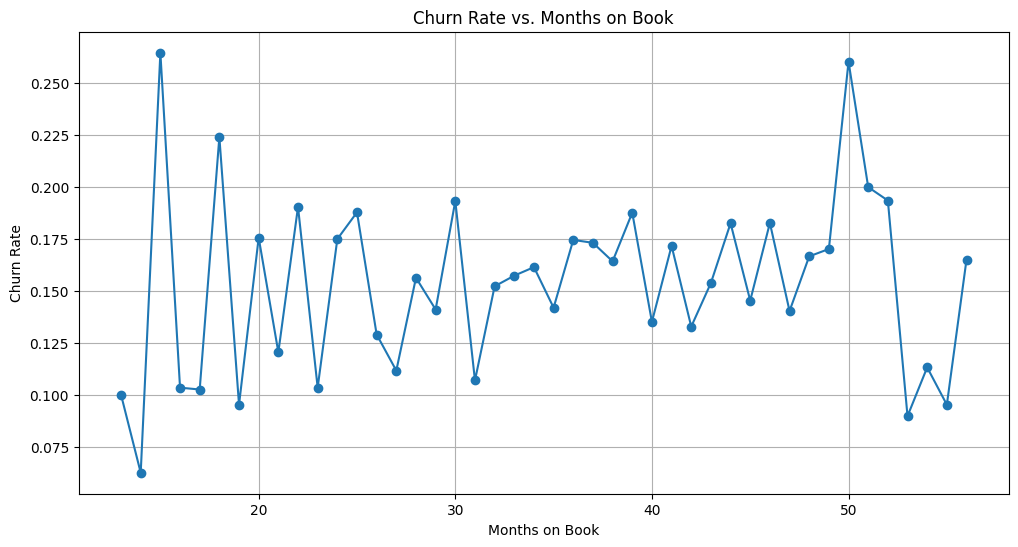

In [ ]:
# Visualize churn rate by months_on_book
plt.figure(figsize=(12, 6))
plt.plot(churn_by_months_on_book.index, churn_by_months_on_book['Churn Rate'], marker='o', linestyle='-')
plt.title('Churn Rate vs. Months on Book')
plt.xlabel('Months on Book')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()

Berdasarkan visualisasi dan data churn_by_months_on_book, churn rate cenderung bervariasi seiring dengan lamanya pelanggan menjadi nasabah. Tidak ada pola yang jelas menunjukkan bahwa semakin lama seorang nasabah menjadi pelanggan, kemungkinan churnnya akan semakin kecil secara konsisten. Terdapat fluktuasi pada churn rate di berbagai "months on book".

## Churn Rate by Contacts Count (Last 12 Months)

In [ ]:
# Manjumlahkan churn rate berdasarkan contacts_count_12_mon
churn_by_contacts = df.groupby('contacts_count_12_mon')['attrition_flag'].value_counts().unstack().fillna(0)

# Menjumlahkan churn rate
churn_by_contacts['Churn Rate'] = churn_by_contacts['Attrited Customer'] / (churn_by_contacts['Attrited Customer'] + churn_by_contacts['Existing Customer'])

print("Churn Rate by Contacts Count (Last 12 Months):")
display(churn_by_contacts[['Attrited Customer', 'Existing Customer', 'Churn Rate']])

Churn Rate by Contacts Count (Last 12 Months):


attrition_flag,Attrited Customer,Existing Customer,Churn Rate
contacts_count_12_mon,,,
0,7.0,392.0,0.017544
1,108.0,1391.0,0.072048
2,403.0,2824.0,0.124884
3,681.0,2699.0,0.201479
4,315.0,1077.0,0.226293
5,59.0,117.0,0.335227
6,54.0,0.0,1.000000


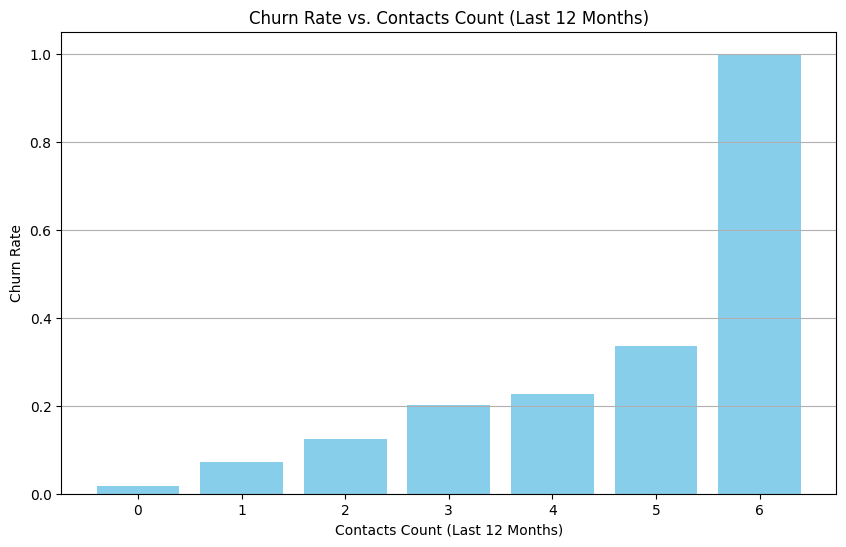

In [ ]:
# Visualize churn rate by contacts_count_12_mon
plt.figure(figsize=(10, 6))
plt.bar(churn_by_contacts.index, churn_by_contacts['Churn Rate'], color='skyblue')
plt.title('Churn Rate vs. Contacts Count (Last 12 Months)')
plt.xlabel('Contacts Count (Last 12 Months)')
plt.ylabel('Churn Rate')
plt.xticks(churn_by_contacts.index)
plt.grid(axis='y')
plt.show()

Berdasarkan analisis data dan visualisasi, terlihat bahwa semakin sering pelanggan berinteraksi dengan bank dalam 12 bulan terakhir, semakin tinggi kemungkinan mereka untuk churn. Pelanggan dengan jumlah kontak 5 dan 6 memiliki churn rate yang sangat tinggi, bahkan mencapai 100% untuk pelanggan dengan 6 kontak. Hal ini menunjukkan bahwa frekuensi kontak yang tinggi mungkin menandakan adanya masalah atau ketidakpuasan yang mengarah pada churn

# Feature Engineeringg

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('attrition_flag', axis=1)
y = df['attrition_flag']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8101, 20)
Shape of X_test: (2026, 20)
Shape of y_train: (8101,)
Shape of y_test: (2026,)


In [ ]:
X_train.head()

,user_id,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
1602,806407308,54,F,3,College,Single,Unknown,Blue,49,6,2,3,13184.0,0,13184.0,1.166,2047,33,0.179,0.000
7791,801786483,51,M,0,High School,Single,$80K - $120K,Blue,45,3,2,3,10648.0,2517,8131.0,0.708,4930,89,0.978,0.236
7177,779870883,45,F,4,High School,Single,$40K - $60K,Blue,29,3,2,1,4595.0,1781,2814.0,0.708,3746,68,0.545,0.388
97,720336708,53,M,3,Doctorate,Married,$40K - $60K,Blue,35,5,3,2,3789.0,1706,2083.0,1.047,1609,42,0.680,0.450
4820,716769783,48,F,2,Graduate,Married,Unknown,Blue,40,3,2,4,5104.0,736,4368.0,0.679,3943,78,0.696,0.144


In [ ]:
# Drop column User_id pada data train dan test
X_train = X_train.drop('user_id', axis=1)
X_test = X_test.drop('user_id', axis=1)

In [ ]:
# menampilkan categorical columns dari training data
categorical_cols = X_train.select_dtypes(include='object').columns

print("Categorical columns and their unique values and counts:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    display(X_train[col].value_counts())


Categorical columns and their unique values and counts:

Column: gender


,count
gender,
F,4262
M,3839



Column: education_level


,count
education_level,
Graduate,2442
High School,1603
Unknown,1232
Uneducated,1219
College,829
Post-Graduate,404
Doctorate,372



Column: marital_status


,count
marital_status,
Married,3755
Single,3156
Unknown,599
Divorced,591



Column: income_category


,count
income_category,
Less than $40K,2838
$40K - $60K,1442
$80K - $120K,1244
$60K - $80K,1104
Unknown,873
$120K +,600



Column: card_category


,count
card_category,
Blue,7541
Silver,455
Gold,91
Platinum,14


## Encoding

In [ ]:
# Label Encoding
# Menentukan mapping untuk kolom biner
binary_mapping = {
    'gender': {'M': 1, 'F': 0},
}

# Menerappkan mapping untuk X_train dan X_test
X_train = X_train.replace(binary_mapping)
X_test = X_test.replace(binary_mapping)

print("X_train after binary encoding:")
display(X_train.head())

print("\nX_test after binary encoding:")
display(X_test.head())

X_train after binary encoding:


/tmp/ipython-input-1110440736.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = X_train.replace(binary_mapping)
/tmp/ipython-input-1110440736.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test = X_test.replace(binary_mapping)


,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
1602,54,0,3,College,Single,Unknown,Blue,49,6,2,3,13184.0,0,13184.0,1.166,2047,33,0.179,0.000
7791,51,1,0,High School,Single,$80K - $120K,Blue,45,3,2,3,10648.0,2517,8131.0,0.708,4930,89,0.978,0.236
7177,45,0,4,High School,Single,$40K - $60K,Blue,29,3,2,1,4595.0,1781,2814.0,0.708,3746,68,0.545,0.388
97,53,1,3,Doctorate,Married,$40K - $60K,Blue,35,5,3,2,3789.0,1706,2083.0,1.047,1609,42,0.680,0.450
4820,48,0,2,Graduate,Married,Unknown,Blue,40,3,2,4,5104.0,736,4368.0,0.679,3943,78,0.696,0.144



X_test after binary encoding:


,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
9242,47,1,3,Graduate,Single,$60K - $80K,Silver,36,1,1,2,30498.0,1990,28508.0,0.839,16202,120,0.791,0.065
7036,51,1,1,High School,Married,Less than $40K,Blue,41,3,4,3,1438.3,0,1438.3,0.623,4312,81,0.723,0.000
914,55,1,2,College,Married,$80K - $120K,Blue,45,5,1,2,2929.0,2431,498.0,1.632,1903,39,0.625,0.830
9681,40,0,4,Uneducated,Married,Unknown,Blue,29,2,3,3,3326.0,2181,1145.0,0.827,13583,110,0.746,0.656
9026,62,1,1,High School,Single,$60K - $80K,Blue,46,2,3,3,7547.0,2477,5070.0,1.021,5294,73,0.698,0.328


In [ ]:
# One-Hot Encoding
# Menerapkan One-Hot Encoding untuk 'education_level', 'marital_status', 'income_category', 'card_category' columns
X_train = pd.get_dummies(X_train, columns=['education_level', 'marital_status', 'income_category', 'card_category'], dtype=int)
X_test = pd.get_dummies(X_test, columns=['education_level', 'marital_status', 'income_category', 'card_category'], dtype=int)

print("X_train after One-Hot Encoding:")
display(X_train.head())

print("\nX_test after One-Hot Encoding:")
display(X_test.head())

X_train after One-Hot Encoding:


,customer_age,gender,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,education_level_College,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,education_level_Unknown,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,income_category_$120K +,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver
1602,54,0,3,49,6,2,3,13184.0,0,13184.0,1.166,2047,33,0.179,0.000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
7791,51,1,0,45,3,2,3,10648.0,2517,8131.0,0.708,4930,89,0.978,0.236,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
7177,45,0,4,29,3,2,1,4595.0,1781,2814.0,0.708,3746,68,0.545,0.388,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
97,53,1,3,35,5,3,2,3789.0,1706,2083.0,1.047,1609,42,0.680,0.450,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4820,48,0,2,40,3,2,4,5104.0,736,4368.0,0.679,3943,78,0.696,0.144,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0



X_test after One-Hot Encoding:


,customer_age,gender,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,education_level_College,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,education_level_Unknown,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,income_category_$120K +,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver
9242,47,1,3,36,1,1,2,30498.0,1990,28508.0,0.839,16202,120,0.791,0.065,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
7036,51,1,1,41,3,4,3,1438.3,0,1438.3,0.623,4312,81,0.723,0.000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
914,55,1,2,45,5,1,2,2929.0,2431,498.0,1.632,1903,39,0.625,0.830,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
9681,40,0,4,29,2,3,3,3326.0,2181,1145.0,0.827,13583,110,0.746,0.656,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
9026,62,1,1,46,2,3,3,7547.0,2477,5070.0,1.021,5294,73,0.698,0.328,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
# Ubah nilai teks menjadi numerik
y_train = y_train.map({'Attrited Customer': 1, 'Existing Customer': 0})
y_test = y_test.map({'Attrited Customer': 1, 'Existing Customer': 0})

# Cek hasilnya
print("Distribusi y_train:")
print(y_train.value_counts())

print("\nDistribusi y_test:")
print(y_test.value_counts())


Distribusi y_train:
attrition_flag
0    6799
1    1302
Name: count, dtype: int64

Distribusi y_test:
attrition_flag
0    1701
1     325
Name: count, dtype: int64


### Scaling Numerical Features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding the encoded categorical and binary columns)
numerical_cols = X_train.select_dtypes(include=np.number).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns in both training and testing sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("X_train after scaling:")
display(X_train.head())

print("\nX_test after scaling:")
display(X_test.head())

X_train after scaling:


,customer_age,gender,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,education_level_College,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,education_level_Unknown,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,income_category_$120K +,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver
1602,0.960879,-0.949079,0.500810,1.641549,1.408689,-0.334749,0.498306,0.499350,-1.426933,0.627046,1.849946,-0.690664,-1.352045,-2.236148,-0.997981,2.961759,-0.219386,-0.656906,-0.496680,-0.229103,-0.420867,-0.423505,-0.280526,-0.929523,1.251741,-0.282569,-0.282824,-0.465348,-0.397218,-0.425935,-0.734327,2.877411,0.272508,-0.106587,-0.041607,-0.243943
7791,0.585187,1.053653,-1.812662,1.138843,-0.530662,-0.334749,0.498306,0.220896,1.662813,0.072169,-0.236908,0.158083,1.032495,1.116504,-0.138838,-0.337637,-0.219386,-0.656906,2.013368,-0.229103,-0.420867,-0.423505,-0.280526,-0.929523,1.251741,-0.282569,-0.282824,-0.465348,-0.397218,2.347777,-0.734327,-0.347535,0.272508,-0.106587,-0.041607,-0.243943
7177,-0.166196,-0.949079,1.271967,-0.871977,-0.530662,-0.334749,-1.313533,-0.443727,0.759336,-0.511698,-0.236908,-0.190483,0.138293,-0.700390,0.414508,-0.337637,-0.219386,-0.656906,2.013368,-0.229103,-0.420867,-0.423505,-0.280526,-0.929523,1.251741,-0.282569,-0.282824,2.148928,-0.397218,-0.425935,-0.734327,-0.347535,0.272508,-0.106587,-0.041607,-0.243943
97,0.835648,1.053653,0.500810,-0.117919,0.762239,0.662971,-0.407614,-0.532227,0.667269,-0.591970,1.307729,-0.819610,-0.968815,-0.133922,0.640214,-0.337637,4.558166,-0.656906,-0.496680,-0.229103,-0.420867,-0.423505,-0.280526,1.075821,-0.798887,-0.282569,-0.282824,2.148928,-0.397218,-0.425935,-0.734327,-0.347535,0.272508,-0.106587,-0.041607,-0.243943
4820,0.209496,-0.949079,-0.270348,0.510462,-0.530662,-0.334749,1.404226,-0.387839,-0.523456,-0.341051,-0.369046,-0.132487,0.564103,-0.066785,-0.473758,-0.337637,-0.219386,1.522289,-0.496680,-0.229103,-0.420867,-0.423505,-0.280526,1.075821,-0.798887,-0.282569,-0.282824,-0.465348,-0.397218,-0.425935,-0.734327,2.877411,0.272508,-0.106587,-0.041607,-0.243943



X_test after scaling:


,customer_age,gender,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,education_level_College,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,education_level_Unknown,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,income_category_$120K +,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver
9242,0.084265,1.053653,0.500810,0.007757,-1.823563,-1.332469,-0.407614,2.400438,1.015894,2.309795,0.359987,3.476528,2.352508,0.331840,-0.761353,-0.337637,-0.219386,1.522289,-0.496680,-0.229103,-0.420867,-0.423505,-0.280526,-0.929523,1.251741,-0.282569,-0.282824,-0.465348,2.517511,-0.425935,-0.734327,-0.347535,-3.669615,-0.106587,-0.041607,4.099316
7036,0.585187,1.053653,-1.041505,0.636138,-0.530662,1.660690,0.498306,-0.790335,-1.426933,-0.662765,-0.624207,-0.023854,0.691846,0.046508,-0.997981,-0.337637,-0.219386,-0.656906,2.013368,-0.229103,-0.420867,-0.423505,-0.280526,1.075821,-0.798887,-0.282569,-0.282824,-0.465348,-0.397218,-0.425935,1.361791,-0.347535,0.272508,-0.106587,-0.041607,-0.243943
914,1.086109,1.053653,-0.270348,1.138843,0.762239,-1.332469,-0.407614,-0.626655,1.557244,-0.766021,3.973253,-0.733057,-1.096558,-0.364706,2.023579,2.961759,-0.219386,-0.656906,-0.496680,-0.229103,-0.420867,-0.423505,-0.280526,1.075821,-0.798887,-0.282569,-0.282824,-0.465348,-0.397218,2.347777,-0.734327,-0.347535,0.272508,-0.106587,-0.041607,-0.243943
9681,-0.792348,-0.949079,1.271967,-0.871977,-1.177113,0.662971,0.498306,-0.583064,1.250356,-0.694973,0.305309,2.705502,1.926697,0.143018,1.390144,-0.337637,-0.219386,-0.656906,-0.496680,-0.229103,2.376049,-0.423505,-0.280526,1.075821,-0.798887,-0.282569,-0.282824,-0.465348,-0.397218,-0.425935,-0.734327,2.877411,0.272508,-0.106587,-0.041607,-0.243943
9026,1.962723,1.053653,-1.041505,1.264520,-1.177113,0.662971,0.498306,-0.119596,1.613711,-0.263963,1.189261,0.265244,0.351198,-0.058393,0.196081,-0.337637,-0.219386,-0.656906,2.013368,-0.229103,-0.420867,-0.423505,-0.280526,-0.929523,1.251741,-0.282569,-0.282824,-0.465348,2.517511,-0.425935,-0.734327,-0.347535,0.272508,-0.106587,-0.041607,-0.243943


In [ ]:
# Check Class Distribution
print("Class distribution in y_train:")
display(y_train.value_counts())

print("\nClass distribution in y_test:")
display(y_test.value_counts())

Class distribution in y_train:


,count
attrition_flag,
0,6799
1,1302



Class distribution in y_test:


,count
attrition_flag,
0,1701
1,325


### Address Class Imbalance with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution in y_train_smote after SMOTE:")
display(y_train_smote.value_counts())

Class distribution in y_train_smote after SMOTE:


,count
attrition_flag,
1,6799
0,6799


# Pemodelan Machine Learning

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,        # jumlah pohon (default 100)
    max_depth=8,          # maksimal sampai 8 tingkat percabangan untuk mencegah overfitting
    random_state=42,         # agar hasilnya konsisten

)

# Melatih model
rf_model.fit(X_train_smote, y_train_smote)

from sklearn.model_selection import cross_val_score
# Cross-validation fokus pada recall
cv_scores = cross_val_score(
  rf_model,
  X_train_smote,
  y_train_smote,
  cv = 5,
  scoring = 'recall',
)

print("=== Random Forest Model ===")
print(f"Cross-Validation Recall: {cv_scores.mean():.3f}")

=== Random Forest Model ===
Cross-Validation Recall: 0.957


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression dengan class_weight='balanced'
logreg_model = LogisticRegression(
    penalty = 'l2',
    C = 1.0,
    random_state=42,
    solver = 'lbfgs',
     max_iter=200 # untuk model seimbang
)

# melatih model
logreg_model.fit(X_train_smote, y_train_smote)

# Cross-validation fokus pada recall
cv_scores = cross_val_score(
  logreg_model,
  X_train_smote,
  y_train_smote,
  cv = 5,
  scoring = 'recall',
)

print("=== Logistic Regression Model ===")
print(f"Cross-Validation Recall: {cv_scores.mean():.3f}")

=== Logistic Regression Model ===
Cross-Validation Recall: 0.880


### Decision tree

In [ ]:
# Inisialisasi Model Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=6,   # dibatasi agar tidak overfitting
    random_state=42
)

# Latih model
dt_model.fit(X_train_smote, y_train_smote)

# Cross-validation dengan fokus pada recall
cv_scores = cross_val_score(
    dt_model,
    X_train_smote,
    y_train_smote,
    cv=5,
    scoring='recall'
)

print("=== Model Decision Tree ===")
print(f"Cross-Validation Recall: {cv_scores.mean():.3f}")

=== Model Decision Tree ===
Cross-Validation Recall: 0.928


- Decision Tree mudah overfitting, jadi dibatasi ke 6; sedangkan Random Forest lebih stabil karena gabungan banyak pohon, jadi bisa sedikit lebih dalam (8).
- Dengan menggunakan Recall sebagai metrik utama di cross-validation, untuk melatih model  agar fokus untuk meminimalkan jumlah pelanggan churn yang terlewatkan (False Negatives). Tujuannya adalah agar model "sensitif" terhadap pelanggan yang menunjukkan tanda-tanda akan churn, sehingga kita bisa mengambil tindakan pencegahan.

###  Baseline Model

In [ ]:
from sklearn.dummy import DummyClassifier
baseline_model = DummyClassifier(strategy='most_frequent', random_state=42)
baseline_model.fit(X_train, y_train)       # latih model baseline
y_pred_baseline = baseline_model.predict(X_test)

# Evaluasi Model

## Random Forest

In [ ]:
# Evaluasi Setelah Model Dilatih
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi
y_pred_train = rf_model.predict(X_train_smote) # Use X_train for training set evaluation
y_pred_test = rf_model.predict(X_test)

# Evaluasi Train
print("Train Classification Report:")
print(classification_report(y_train_smote, y_pred_train))

# Evaluasi Test
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test))

Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6799
           1       0.97      0.98      0.97      6799

    accuracy                           0.97     13598
   macro avg       0.97      0.97      0.97     13598
weighted avg       0.97      0.97      0.97     13598

Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1701
           1       0.76      0.86      0.81       325

    accuracy                           0.93      2026
   macro avg       0.86      0.90      0.88      2026
weighted avg       0.94      0.93      0.94      2026

Confusion Matrix (Test):
[[1611   90]
 [  45  280]]


## Logistic Regression

In [ ]:
# Evaluasi Setelah Model Dilatih
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi
y_pred_train = logreg_model.predict(X_train_smote)
y_pred_test = logreg_model.predict(X_test)

# Evaluasi Train
print("Train Classification Report:")
print(classification_report(y_train_smote, y_pred_train))

# Evaluasi Test
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test))


Train Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6799
           1       0.87      0.88      0.87      6799

    accuracy                           0.87     13598
   macro avg       0.87      0.87      0.87     13598
weighted avg       0.87      0.87      0.87     13598

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1701
           1       0.53      0.83      0.65       325

    accuracy                           0.86      2026
   macro avg       0.75      0.84      0.78      2026
weighted avg       0.89      0.86      0.87      2026

Confusion Matrix (Test):
[[1464  237]
 [  56  269]]


## Decision tree

In [ ]:
# Evaluasi Setelah Model Dilatih
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi
y_pred_train = dt_model.predict(X_train_smote)
y_pred_test = dt_model.predict(X_test)

# Evaluasi Train
print("Train Classification Report:")
print(classification_report(y_train_smote, y_pred_train))

# Evaluasi Test
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test))


Train Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6799
           1       0.95      0.94      0.94      6799

    accuracy                           0.94     13598
   macro avg       0.94      0.94      0.94     13598
weighted avg       0.94      0.94      0.94     13598

Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1701
           1       0.71      0.85      0.77       325

    accuracy                           0.92      2026
   macro avg       0.84      0.89      0.86      2026
weighted avg       0.93      0.92      0.92      2026

Confusion Matrix (Test):
[[1588  113]
 [  49  276]]


<Figure size 800x600 with 0 Axes>

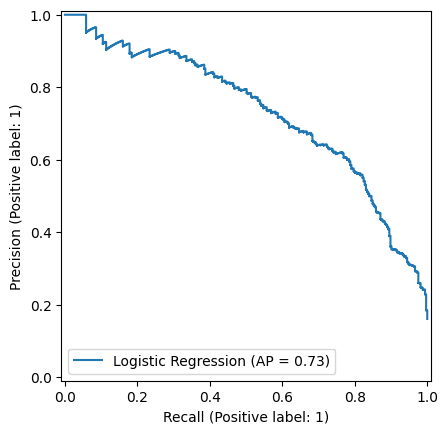

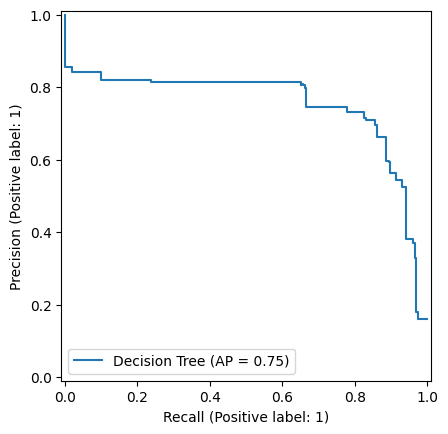

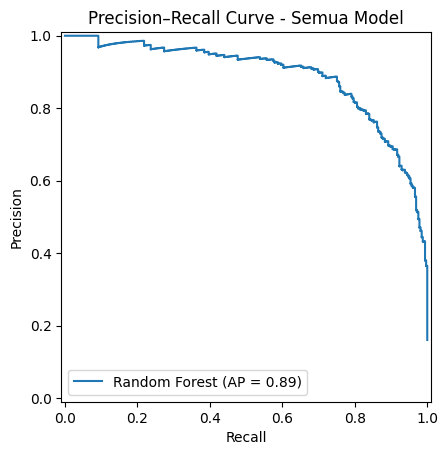

In [ ]:
# Precision–Recall Curve untuk semua model
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for model, name in [
    (logreg_model, "Logistic Regression"),
    (dt_model, "Decision Tree"),
    (rf_model, "Random Forest")
]:
    PrecisionRecallDisplay.from_estimator(
        model,
        X_test,
        y_test,
        name=name
    )

plt.title("Precision–Recall Curve - Semua Model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_scores(y_true, y_pred):
    """Fungsi untuk menghitung metrik evaluasi"""
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

In [ ]:
# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Hitung skor tiap model
scores = {
    'Baseline (Most Frequent)': get_scores(y_test, y_pred_baseline),
    'Logistic Regression': get_scores(y_test, y_pred_logreg),
    'Decision Tree': get_scores(y_test, y_pred_dt),
    'Random Forest': get_scores(y_test, y_pred_rf)
}

In [ ]:
# Ubah ke DataFrame agar mudah dibaca
df_scores = pd.DataFrame(scores).T
print("===📈 Perbandingan Performa Model vs Baseline ===")
print(df_scores.round(3))

===📈 Perbandingan Performa Model vs Baseline ===
                          Accuracy  Precision  Recall  F1-Score
Baseline (Most Frequent)     0.840      0.000   0.000     0.000
Logistic Regression          0.855      0.532   0.828     0.647
Decision Tree                0.920      0.710   0.849     0.773
Random Forest                0.933      0.757   0.862     0.806


## Visualisasikan Hasil Evaluasi

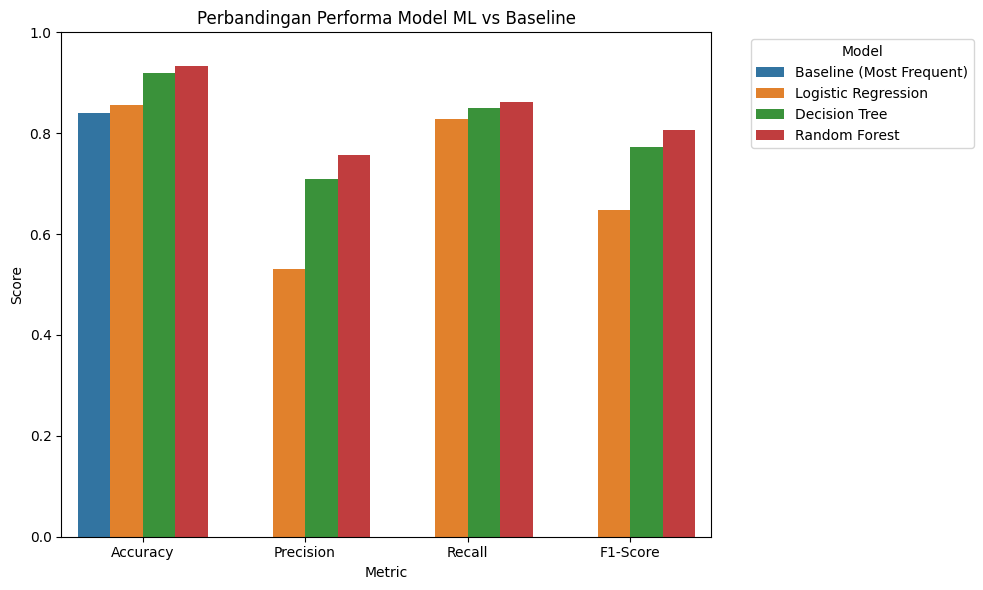

In [ ]:
# Visualisasi Perbandingan
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_scores.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score'),
    x='Metric', y='Score', hue='index'
)
plt.title('Perbandingan Performa Model ML vs Baseline')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insight:
- Random Forest memiliki performa terbaik di semua metrik (Accuracy, Precision, Recall, dan F1-Score). Model ini menunjukkan nilai tertinggi untuk semua metrik tersebut.
- Decision Tree memiliki performa yang lebih baik dibandingkan Logistic Regression dan model Baseline di semua metrik.
Logistic Regression memiliki performa yang lebih baik dibandingkan model Baseline di semua metrik.
- Model Baseline (Most Frequent) memiliki skor terendah untuk semua metrik, yang memang diharapkan karena model ini hanya memprediksi kelas yang paling sering muncul.

# Analisis Interpretabilitas Model

In [ ]:
# Pilih Model Terbaik
# Berdasarkan evaluasi sebelumnya, Random Forest memiliki performa terbaik.
best_model = rf_model
print("Model terbaik yang dipilih untuk interpretasi adalah: Random Forest")

Model terbaik yang dipilih untuk interpretasi adalah: Random Forest


## Feature Importance (Permutation Importance)

Permutation Feature Importance:


,Feature,Importance,Std
35,total_trans_ct,0.130701,0.005975
34,total_trans_amt,0.048519,0.002575
33,total_relationship_count,0.030158,0.003458
32,total_revolving_bal,0.027345,0.003028
31,months_inactive_12_mon,0.008045,0.002175
30,avg_utilization_ratio,0.007453,0.002779
29,customer_age,0.005577,0.001105
28,credit_limit,0.005331,0.001099
27,gender,0.005331,0.001707
26,total_amt_chng_q4_q1,0.005035,0.002525


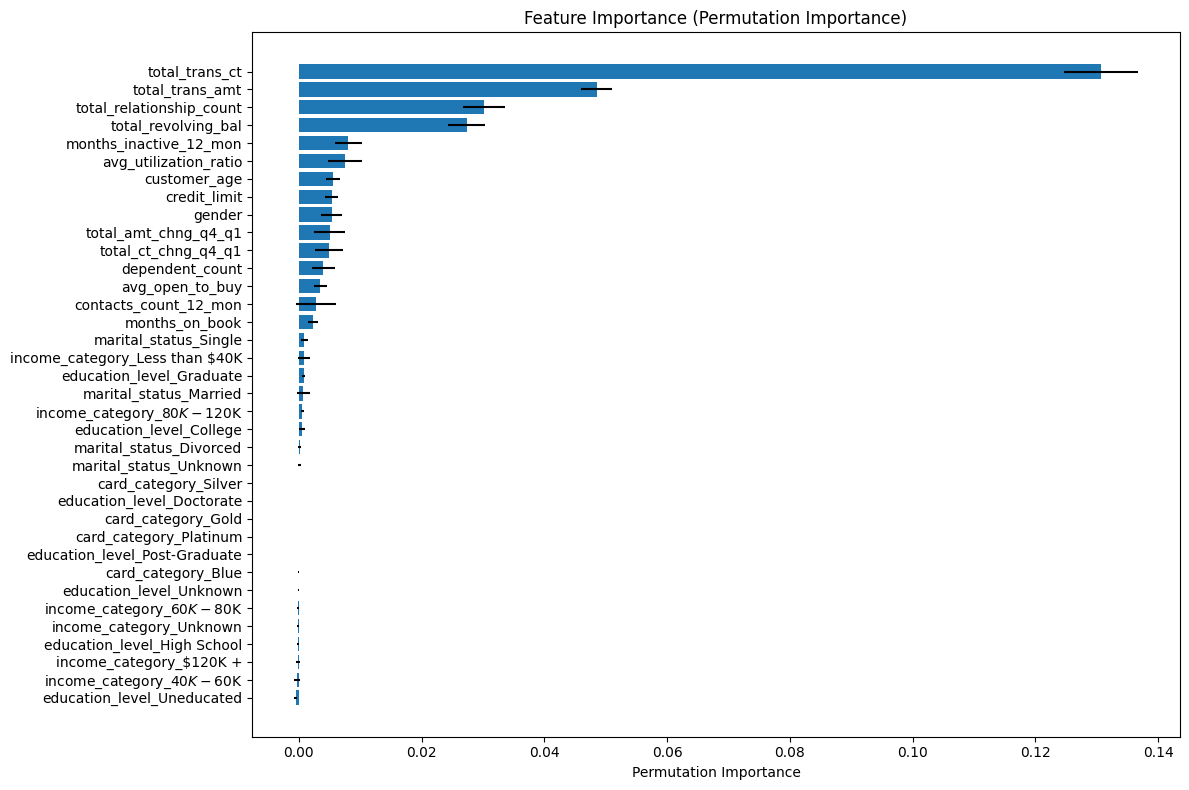

In [ ]:
# Feature Importance (Permutation Importance)
from sklearn.inspection import permutation_importance

# Menghitung Permutation Importance pada data test
perm_importance = permutation_importance(
    best_model,
    X_test,
    y_test,
    n_repeats=10, # jumlah pengacakan
    random_state=42,
    n_jobs=-1     # gunakan semua core processor
)

# Urutkan fitur berdasarkan rata-rata importance
sorted_idx = perm_importance.importances_mean.argsort()

# Membuat DataFrame untuk visualisasi
perm_importance_df = pd.DataFrame({
    'Feature': X_test.columns[sorted_idx],
    'Importance': perm_importance.importances_mean[sorted_idx],
    'Std': perm_importance.importances_std[sorted_idx]
})

# Menampilkan hasil
print("Permutation Feature Importance:")
display(perm_importance_df.sort_values(by='Importance', ascending=False))

# Visualisasikan hasil
plt.figure(figsize=(12, 8))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], xerr=perm_importance_df['Std'])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Permutation Importance)")
plt.tight_layout()
plt.show()

## Interpretasi Global (Partial Dependence Plots)

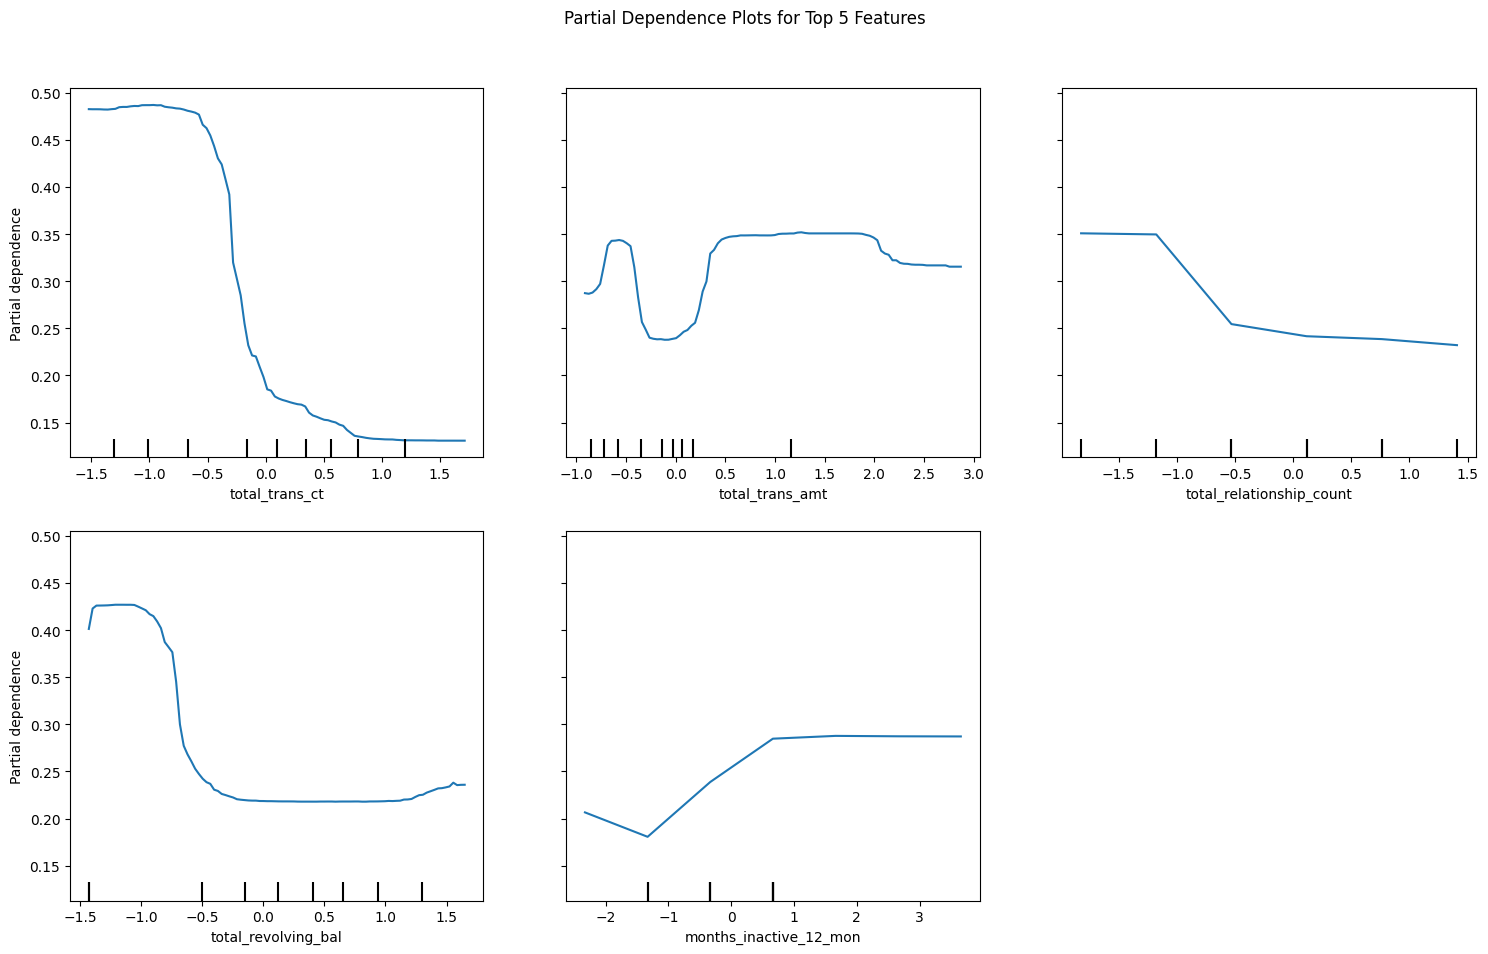

In [ ]:
# Interpretasi Global (Partial Dependence Plots)
from sklearn.inspection import PartialDependenceDisplay

# Pilih fitur-fitur dengan importance tertinggi top 5
# Menyesuaikan jumlah fitur yang ingin divisualisasikan
top_features = perm_importance_df.sort_values(by='Importance', ascending=False)['Feature'].head(5).tolist()

# Membuat PDP untuk fitur-fitur terpenting
fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(
    best_model,
    X_test,
    top_features,
    ax=ax,
)
plt.suptitle('Partial Dependence Plots for Top 5 Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Sesuaikan layout agar judul tidak tumpang tindih
plt.show()

## Interpretasi Lokal (SHAP)

In [ ]:
# Interpretasi Lokal (SHAP)
import shap

# Inisialisasi Javascript untuk visualisasi SHAP
shap.initjs()

# Buat explainer SHAP
# Menggunakan shap.Explainer yang lebih umum
explainer = shap.Explainer(best_model)

# Menghitung nilai SHAP untuk data test
# shap_values akan menjadi list of arrays untuk model klasifikasi
shap_values = explainer(X_test)

# Mengambil nilai SHAP untuk kelas positif (kelas 1 - churn)
# shap_values memiliki 2 elemen (untuk kelas 0 dan 1)
if len(shap_values.values.shape) == 3:
    shap_values_churn = shap_values[:, :, 1]
else:
    shap_values_churn = shap_values

print("SHAP values calculated.")

SHAP values calculated.


## Visualisasi SHAP Global (Summary Plot)

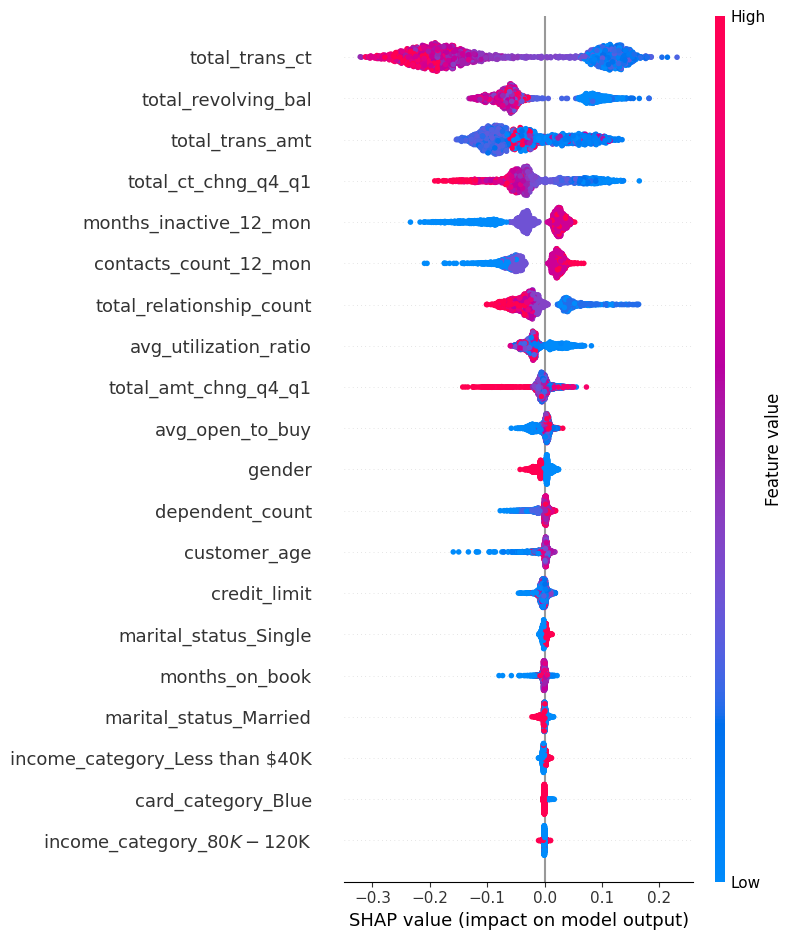

In [ ]:
# Visualisasi SHAP Global
# Membuat plot ringkasan SHAP
# Gunakan shap_values_churn yang sudah diambil untuk kelas 1
shap.summary_plot(shap_values_churn, X_test)

## Visualisasi SHAP Lokal (Force Plot)

In [ ]:
# Visualisasi SHAP Lokal
# Memilih indeks instance yang ingin dijelaskan indeks 0 dari X_test
instance_idx = 0

# Inisialisasi Javascript untuk visualisasi SHAP
shap.initjs()

# Membuat objek Explanation baru untuk instance tunggal dan kelas target (churn)
# Menggunakan nilai SHAP, base value, dan data fitur untuk instance tersebut
explanation_instance = shap.Explanation(
    values=shap_values.values[instance_idx, :, 1],       # Nilai SHAP untuk instance dan kelas target
    base_values=explainer.expected_value[1],
    data=X_test.iloc[instance_idx,:].values,       # Feature values for the instance
    feature_names=X_test.columns.tolist()          # Feature names
)

# Membuat force plot menggunakan objek Explanation yang baru dibuat
shap.force_plot(explanation_instance, link="logit")

Rangkuman dari temuan:

- Model Terbaik: Random Forest dipilih sebagai model terbaik berdasarkan performanya di berbagai metrik evaluasi dibandingkan Logistic Regression, Decision Tree, dan model Baseline.
- Feature Importance (Permutation Importance): Fitur-fitur seperti total_trans_ct, total_trans_amt, total_relationship_count, dan total_revolving_bal muncul sebagai yang paling penting dalam memprediksi churn. Yang menunjukkan bahwa aktivitas transaksi dan hubungan pelanggan dengan bank sangat berpengaruh terhadap keputusan churn.
- Interpretasi Global (Partial Dependence Plots): PDP membantu melihat tren umum. Misalnya, bagaimana probabilitas churn berubah seiring dengan peningkatan jumlah transaksi atau saldo revolving. Agar bisa melihat apakah ada titik kritis atau pola non-linear dalam hubungan ini.
- Interpretasi Lokal (SHAP): Plot ringkasan SHAP memberikan gambaran global tentang bagaimana fitur-fitur mempengaruhi prediksi di seluruh dataset. Warna dan posisi titik menunjukkan arah dan besarnya pengaruh fitur terhadap prediksi churn (misalnya, nilai tinggi dari fitur X cenderung meningkatkan probabilitas churn). Force plot memberikan penjelasan mendalam untuk pelanggan individu, menunjukkan fitur mana yang mendorong prediksi churn (ditunjukkan dengan warna merah) atau tetap menjadi pelanggan (ditunjukkan dengan warna biru) dan seberapa besar dorongan tersebut.

Secara keseluruhan, analisis interpretasi memberikan wawasan berharga tentang faktor-faktor pendorong churn dan memungkinkan untuk memahami tidak hanya model mana yang bekerja dengan baik tetapi juga mengapa model membuat prediksi tertentu, baik secara global maupun lokal untuk pelanggan individu.

# Dokumentasi dan Rekomendasi

# Dokumentasi Proses Analisis Churn Pelanggan

## 1. Persiapan dan Penginstalan Pustaka

- Menginstal pustaka Python yang relevan untuk analisis data, pemodelan, dan interpretasi: dalex, scikit-plot, shap, dan lime.
- Pustaka dipilih untuk mendukung eksplorasi data, pembangunan model prediksi churn, dan pemahaman mendalam mengenai faktor-faktor yang memengaruhi keputusan churn.

## 2. Memuat dan Memeriksa Data

- Memuat dataset bank_churn_data.csv menggunakan pandas.
- Melakukan pemeriksaan awal terhadap data (df.head(), df.info(), df.shape, df.isna().sum()).
- Memeriksa distribusi nilai unik di setiap kolom, termasuk identifikasi dan penanganan nilai 'Unknown' di beberapa kolom kategorikal.
- Memastikan tidak ada duplikasi user_id.

## 3. Eksplorasi Data (EDA)

- **Distribusi Usia Pelanggan:** Menganalisis distribusi usia pelanggan dan memvisualisasikannya menggunakan histogram.
- **Pengelompokan Usia:** Membuat kolom baru age_group untuk mengelompokkan usia pelanggan ke dalam beberapa kategori.
- **Churn per Kelompok Usia:** Menghitung dan memvisualisasikan jumlah pelanggan yang churn berdasarkan kelompok usia menggunakan bar plot. Ditemukan bahwa kelompok usia 45-54 dan 35-44 memiliki jumlah churn tertinggi.
- **Hubungan Tingkat Pendidikan dan Pendapatan dengan Churn:** Menggali hubungan antara tingkat pendidikan dan kategori pendapatan dengan tingkat churn menggunakan tabel silang dan heatmap. Ditemukan bahwa pelanggan dengan tingkat pendidikan Doctorate dan Post-Graduate, serta kategori pendapatan Less than $40K dan Unknow, cenderung memiliki churn rate yang lebih tinggi.
- **Churn Berdasarkan Gender:** Menghitung dan memvisualisasikan churn rate berdasarkan gender menggunakan bar plot. Ditemukan bahwa pelanggan wanita memiliki churn rate sedikit lebih tinggi dibandingkan pria.
- **Churn Rate by Months on Book:** churn rate cenderung bervariasi seiring dengan lamanya pelanggan menjadi nasabah.
- **Churn Rate by Contacts Count (Last 12 Months):**  semakin sering pelanggan berinteraksi dengan bank dalam 12 bulan terakhir, semakin tinggi kemungkinan mereka untuk churn. Pelanggan dengan jumlah kontak 5 dan 6 memiliki churn rate yang sangat tinggi, bahkan mencapai 100% untuk pelanggan dengan 6 kontak.

## 4. Feature Engineering

- Memisahkan fitur (X) dan target (y).
- Membagi data menjadi set pelatihan (training) dan pengujian (testing) dengan perbandingan 80:20 dan menggunakan stratify=y untuk menjaga proporsi kelas target.
- Menghapus kolom user_id karena tidak relevan untuk pemodelan.
- Melakukan *encoding* pada fitur kategorikal:
    - *Label Encoding* untuk kolom biner (gender).
    - *One-Hot Encoding* untuk kolom kategorikal lainnya (education_level, marital_status, income_category, card_category).
- Melakukan *scaling* pada fitur numerikal menggunakan StandardScaler untuk menstandardisasi rentang nilainya.
- Mengubah nilai target (attrition_flag) menjadi numerik (1 untuk 'Attrited Customer', 0 untuk 'Existing Customer').
- Menangani ketidakseimbangan kelas pada data pelatihan menggunakan SMOTE (Synthetic Minority Over-sampling Technique) untuk menyeimbangkan jumlah sampel di kedua kelas.

## 5. Pemodelan Machine Learning

- Melatih beberapa model klasifikasi untuk memprediksi churn:
    - **Random Forest Classifier:** Diinisialisasi dengan n_estimators=100 dan max_depth=8.
    - **Logistic Regression:** Diinisialisasi dengan max_iter=200.
    - **Decision Tree Classifier:** Diinisialisasi dengan max_depth=`.
- Menggunakan *cross-validation* (dengan 5 fold) pada data pelatihan yang sudah di-SMOTE, dengan metrik `recall` sebagai fokus utama, untuk mengevaluasi performa awal model dalam mengidentifikasi pelanggan churn.
- Melatih model *baseline* (`DummyClassifier` dengan strategi 'most_frequent') sebagai perbandingan.

## 6. Evaluasi Model

- Mengevaluasi performa setiap model (Random Forest, Logistic Regression, Decision Tree) dan model baseline pada **data pengujian** yang belum di-SMOTE.
- Menggunakan metrik evaluasi berikut: Accuracy, Precision, Recall, dan F1-Score.
- Menampilkan *classification report* dan *confusion matrix* untuk setiap model.
- Memvisualisasikan Precision-Recall Curve untuk membandingkan kinerja model dalam menyeimbangkan precision dan recall.
- Merangkum skor semua model dalam sebuah DataFrame dan memvisualisasikannya menggunakan bar plot untuk perbandingan yang jelas.

## 7. Analisis Interpretabilitas Model

- Memilih **Random Forest** sebagai model terbaik berdasarkan hasil evaluasi pada data pengujian.
- Melakukan analisis interpretasi pada model Random Forest:
    - **Feature Importance (Permutation Importance):** Menghitung dan memvisualisasikan pentingnya setiap fitur dalam prediksi model menggunakan *permutation importance* pada data pengujian. Fitur-fitur terpenting diidentifikasi (misalnya, total_trans_ct, total_trans_amt, total_relationship_count, total_revolving_bal).
    - **Interpretasi Global (Partial Dependence Plots - PDP):** Membuat PDP untuk fitur-fitur terpenting guna memahami bagaimana nilai fitur tersebut secara rata-rata memengaruhi probabilitas prediksi churn oleh model.
    - **Interpretasi Lokal (SHAP):**
        - Menghitung nilai SHAP untuk data pengujian.
        - Membuat SHAP *summary plot* untuk melihat pengaruh fitur secara global dan arah pengaruhnya.
        - Membuat SHAP *force plot* untuk menjelaskan prediksi churn untuk pelanggan individu tertentu, menunjukkan fitur mana yang mendorong prediksi churn (merah) atau tidak churn (biru).

## 8. Rangkuman Temuan dan Rekomendasi

- **Model Terbaik:** Random Forest menunjukkan performa terbaik di semua metrik evaluasi pada data pengujian, menjadikannya pilihan yang paling sesuai untuk prediksi churn.
- **Faktor Pendorong Churn:** Fitur-fitur terkait aktivitas transaksi (total_trans_ct, total_trans_amt, total_revolving_bal) dan hubungan pelanggan dengan bank (total_relationship_count) merupakan prediktor churn yang paling penting. Usia, gender, dan tingkat pendidikan/pendapatan juga memiliki pengaruh, meskipun mungkin tidak sekuat fitur transaksi/hubungan.
- **Wawasan dari Interpretasi:** PDP dan SHAP memberikan pemahaman mendalam tentang bagaimana fitur-fitur ini memengaruhi prediksi churn, baik secara umum maupun untuk pelanggan spesifik. Misalnya, PDP dapat menunjukkan ambang batas jumlah transaksi di mana probabilitas churn meningkat, sementara SHAP dapat menjelaskan mengapa pelanggan A lebih mungkin churn daripada pelanggan B berdasarkan profil fiturnya.

# Laporan Analisis dan Prediksi Churn Pelanggan Bank

## Tujuan Analisis

Tujuan dari analisis ini adalah:
1. Mengidentifikasi karakteristik dan perilaku pelanggan yang cenderung churn.
2. Membangun model prediksi churn yang akurat untuk mengidentifikasi pelanggan berisiko tinggi.
3. Memberikan wawasan yang dapat ditindaklanjuti kepada tim bisnis untuk mengembangkan strategi retensi pelanggan yang efektif.

## Metodologi

Proses analisis melibatkan langkah-langkah berikut:
1. **Pengumpulan dan Persiapan Data:** Memuat dan membersihkan data pelanggan, termasuk menangani nilai-nilai yang hilang atau tidak diketahui dan melakukan *feature engineering* (encoding dan scaling).
2. **Eksplorasi Data (EDA):** Menganalisis distribusi pelanggan berdasarkan demografi (usia, gender, pendidikan, pendapatan) dan perilaku (aktivitas transaksi, hubungan dengan bank) serta mengaitkannya dengan tingkat churn.
3. **Pemodelan Machine Learning:** Melatih beberapa model klasifikasi (Random Forest, Logistic Regression, Decision Tree) untuk memprediksi churn, menggunakan data pelatihan yang seimbang dengan SMOTE. Model *baseline* juga digunakan sebagai perbandingan.
4. **Evaluasi Model:** Mengevaluasi performa model pada data pengujian menggunakan metrik seperti Accuracy, Precision, Recall, dan F1-Score, dengan fokus khusus pada Recall untuk meminimalkan pelanggan churn yang terlewat. Random Forest teridentifikasi sebagai model dengan performa terbaik.
5. **Interpretasi Model:** Menganalisis model terbaik (Random Forest) untuk memahami faktor-faktor pendorong churn (menggunakan Permutation Importance dan Partial Dependence Plots) serta menjelaskan prediksi untuk pelanggan individu (menggunakan SHAP).

## Temuan Utama

- **Faktor Pendorong Churn:** Analisis interpretasi model secara konsisten menunjukkan bahwa fitur-fitur terkait **aktivitas transaksi** (seperti jumlah total transaksi dan nominal transaksi) dan **hubungan pelanggan dengan bank** (jumlah produk yang digunakan) adalah prediktor churn yang paling penting. Pelanggan dengan aktivitas transaksi rendah dan jumlah produk yang sedikit cenderung memiliki risiko churn yang lebih tinggi.
- **Pengaruh Demografi:** Meskipun tidak sekuat faktor transaksi/hubungan, demografi seperti usia, gender, tingkat pendidikan, dan kategori pendapatan juga memiliki pengaruh terhadap churn, dengan beberapa segmen menunjukkan tingkat churn yang lebih tinggi (misalnya, kelompok usia tertentu, pelanggan wanita, pelanggan dengan tingkat pendidikan/pendapatan rendah atau tidak diketahui).
- **Model Prediksi yang Efektif:** Model Random Forest yang dilatih menunjukkan kemampuan yang baik dalam memprediksi churn, mencapai Recall sebesar 0.86 pada data pengujian, yang berarti model berhasil mengidentifikasi 86% dari pelanggan yang sebenarnya akan churn.

## Rekomendasi untuk Tim Bisnis

Berdasarkan temuan analisis, Rekomendasikan strategi berikut untuk mengurangi churn pelanggan:

1.  **Identifikasi dan Targetkan Pelanggan Berisiko Tinggi:**
    - Gunakan model Random Forest yang telah dilatih untuk secara proaktif mengidentifikasi pelanggan dengan probabilitas churn tinggi.
    - Kembangkan sistem atau proses untuk memantau skor risiko churn pelanggan secara berkala.

2.  **Kembangkan Strategi Retensi Bertarget Berdasarkan Alasan Churn:**
    - Manfaatkan hasil interpretasi model (terutama SHAP *force plot*) untuk memahami **alasan spesifik** mengapa pelanggan individu atau kelompok berisiko churn.
    - Sesuaikan tawaran retensi atau intervensi berdasarkan faktor pendorong churn utama mereka:
        - Untuk pelanggan dengan **aktivitas transaksi rendah**: Tawarkan insentif transaksi, panduan penggunaan fitur, atau program loyalitas yang mendorong aktivitas.
        - Untuk pelanggan dengan **jumlah produk sedikit**: Tawarkan produk atau layanan tambahan yang relevan berdasarkan profil mereka.
        - Untuk pelanggan dengan **masalah layanan (berpotensi dilihat dari jumlah kontak tinggi)**: Tingkatkan kualitas layanan dan selesaikan masalah yang ada.

3.  **Fokus pada Peningkatan Hubungan Pelanggan:**
    - Berikan perhatian khusus pada pelanggan dengan total_relationship_count yang rendah. Tawarkan konsultasi keuangan personal atau manfaatkan data untuk merekomendasikan produk yang sesuai.

4.  **Pertimbangkan Program Loyalitas dan Insentif:**
    - Merancang program loyalitas yang memberikan penghargaan kepada pelanggan berdasarkan tingkat aktivitas dan lamanya menjadi pelanggan.
    - Menawarkan insentif yang menarik untuk pelanggan yang menunjukkan penurunan aktivitas transaksi.

5.  **Segmentasi Pelanggan untuk Intervensi yang Disesuaikan:**
    - Gunakan wawasan dari EDA mengenai demografi dan perilaku untuk membuat segmen pelanggan yang rentan churn.
    - Kembangkan kampanye retensi yang disesuaikan untuk setiap segmen, dengan pesan dan tawaran yang paling relevan bagi mereka.

## Kesimpulan

Analisis churn telah memberikan pemahaman yang kuat tentang faktor-faktor kunci yang memengaruhi keputusan pelanggan untuk meninggalkan bank. Dengan memanfaatkan model prediksi yang akurat dan wawasan dari interpretasi model, tim bisnis dapat secara proaktif mengidentifikasi pelanggan berisiko tinggi dan menerapkan strategi retensi yang ditargetkan dan efektif. Implementasi rekomendasi diharapkan dapat significantly mengurangi tingkat churn dan meningkatkan loyalitas pelanggan.

# Pertanyaan yang Perlu Dijawab

1. Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?
      - Distribusi Usia Pelanggan: Distribusi usia pelanggan bank cenderung membentuk kurva yang paling banyak berada di rentang usia pertengahan (sekitar 35-55 tahun). Usia 44 tahun memiliki jumlah nasabah terbanyak dalam dataset.
      - Usia dengan Kemungkinan Churn Terbesar: Berdasarkan perhitungan jumlah pelanggan yang churn per kelompok usia, kelompok usia 45-54 tahun menunjukkan jumlah pelanggan churn terbanyak (716 pelanggan), diikuti oleh kelompok usia 35-44 tahun (548 pelanggan).
2. Apakah terdapat korelasi antara tingkat pendidikan dan income category? Bagaimana korelasi dari kedua prediktor tersebut terhadap churn?
      - Korelasi antara Tingkat Pendidikan dan Income Category: tingkat pendidikan maupun kategori pendapatan memiliki pengaruh terhadap churn, dan pengaruhnya bisa saling berinteraksi. Pelanggan dengan pendidikan dan pendapatan yang lebih rendah atau tidak diketahui lebih rentan terhadap churn.
3. Apakah terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn?
      - Churn Rate per Gender:
        - Pelanggan wanita (F) memiliki churn rate sekitar 17.36%.
        - Pelanggan laki-laki (M) memiliki churn rate sekitar 14.62%.
      - pelanggan wanita cenderung memiliki kemungkinan churn yang sedikit lebih tinggi dibandingkan dengan pelanggan laki-laki dalam dataset
      - Walaupun perbedaannya sekitar 2.74%, dalam skala besar bank, perbedaan ini bisa dianggap signifikan dan perlu diperhatikan dalam strategi retensi.
4. Apakah semakin lama customer menjadi nasabah maka semakin kecil kemungkinan nasabah tersebut untuk churn?
      - Dari analisis churn rate berdasarkan lamanya menjadi nasabah (Months on Book), tidak ada pola yang jelas menunjukkan bahwa semakin lama seorang nasabah menjadi pelanggan, kemungkinan churnnya akan semakin kecil secara konsisten. Terdapat fluktuasi pada churn rate di berbagai "months on book", seperti yang terlihat pada visualisasi sebelumnya.
5. Apakah semakin sering customer berinteraksi dengan bank dalam 1 tahun terakhir mempengaruhi besar atau kecilnya kemungkinan nasabah untuk churn?
      - Semakin sering pelanggan berinteraksi dengan bank dalam 12 bulan terakhir, semakin tinggi kemungkinan mereka untuk churn. Pelanggan dengan jumlah kontak 5 dan 6 memiliki churn rate yang sangat tinggi, bahkan mencapai 100% untuk pelanggan dengan 6 kontak.
6. Buatlah model prediksi dengan menggunakan model machine learning (bebas, tidak dibatasi) dan evaluasi seberapa baik model yang anda buat.
      - Model Random Forest menunjukkan performa terbaik di semua metrik (Accuracy, Precision, Recall, dan F1-Score) dibandingkan dengan model Logistic Regression, Decision Tree, dan model Baseline. Secara khusus, Random Forest mencapai Recall sebesar 0.862 pada data pengujian, yang berarti model ini mampu mengidentifikasi sekitar 86.2% dari pelanggan yang sebenarnya akan churn.
      - Model Decision Tree juga menunjukkan performa yang baik, melampaui Logistic Regression dan Baseline. Logistic Regression juga lebih baik dari Baseline, tetapi performanya secara umum lebih rendah dari Decision Tree dan Random Forest.
7. Anda ingin meyakinkan stakeholder anda bahwa model yang anda gunakan akan lebih baik dalam mengidentifikasi customer yang akan churn dibandingkan tanpa menggunakan model. Apa metrik yang dapat anda gunakan untuk membuktikan hal ini? Visualkan!
      - Untuk meyakinkan stakeholder bahwa model yang digunakan lebih baik dalam mengidentifikasi pelanggan yang akan churn dibandingkan tanpa menggunakan model, metrik kunci yang paling relevan adalah Recall.
      - Random Forest Model (Model Terbaik): Memiliki matrik Recall sekitar 0.862. Yang berarti model Random Forest mampu mengidentifikasi sekitar 86.2% dari total pelanggan yang sebenarnya akan churn di data pengujian.
      - Baseline Model (Most Frequent): Memiliki Recall sebesar 0.000. Ini karena model baseline hanya memprediksi kelas mayoritas ("Existing Customer") dan tidak pernah memprediksi "Attrited Customer", sehingga gagal mengidentifikasi pelanggan churn sama sekali.
      - Jadi model Random Forest memiliki kemampuan yang jauh lebih unggul dalam mengidentifikasi pelanggan yang akan churn dibandingkan dengan tidak menggunakan model sama sekali. Dan terdapat tabel perbandingan skor model dan visualisasi bar plot untuk menyoroti perbedaan signifikan pada metrik Recall antara Random Forest dan Baseline.
8. Karena stakeholder anda membutuhkan knowledge dari model, analisislah model yang anda buat dengan menggunakan explanatory model analysis dan buatlah rekomendasi berdasarkan hasil dari analisis tersebut.

Berdasarkan analisis model yang telah dilakukan menggunakan explanatory model analysis (Permutation Importance, Partial Dependence Plots, dan SHAP), berikut adalah rangkuman temuan dan rekomendasi untuk stakeholder:

Rangkuman Temuan dari Analisis Model:
- Model Terbaik: Random Forest dipilih sebagai model terbaik berdasarkan performanya yang unggul dalam memprediksi churn di semua metrik evaluasi, terutama Recall yang tinggi.
- Fitur Pendorong Churn Utama (Berdasarkan Permutation Importance): Fitur-fitur yang paling berpengaruh dalam memprediksi churn adalah yang terkait dengan aktivitas transaksi dan hubungan pelanggan dengan bank.
    - total_trans_ct (jumlah total transaksi dalam 12 bulan terakhir)
    - total_trans_amt (total nominal transaksi dalam 12 bulan terakhir)
    - total_relationship_count (jumlah produk yang digunakan pelanggan)
    - total_revolving_bal (total dana yang digunakan dalam satu periode)
- Wawasan Global tentang Pengaruh Fitur (Berdasarkan Partial Dependence Plots): PDP membantu melihat tren umum bagaimana fitur-fitur terpenting memengaruhi probabilitas churn. Misalnya, PDP dapat menunjukkan bahwa probabilitas churn cenderung menurun seiring dengan peningkatan jumlah transaksi atau jumlah produk bank yang digunakan.
- Memahami Prediksi Individual (Berdasarkan SHAP):
    - SHAP summary plot memberikan gambaran global tentang fitur mana yang paling penting dan ke arah mana (meningkatkan atau menurunkan probabilitas churn) pengaruhnya.
    - SHAP force plot memungkinkan untuk menjelaskan prediksi churn untuk pelanggan individu. Ini menunjukkan secara spesifik fitur mana pada profil pelanggan tersebut yang paling kuat mendorong prediksi churn (ditandai warna merah) atau prediksi tidak churn (ditandai warna biru). Ini sangat powerful untuk memahami "mengapa" model memprediksi seorang pelanggan akan churn.

Rekomendasi Berdasarkan Hasil Analisis Model:
- Fokus pada Aktivitas Transaksi dan Hubungan Pelanggan: Dikarenakan fitur-fitur ini adalah prediktor churn terkuat, strategi retensi harus diprioritaskan pada upaya meningkatkan aktivitas transaksi dan mendorong pelanggan untuk menggunakan lebih banyak produk bank.
    - Tindakan: Tawarkan insentif untuk transaksi, program loyalitas berbasis volume transaksi, atau program bundling produk.
- Identifikasi Pelanggan Berisiko Tinggi Secara Proaktif: Gunakan model Random Forest untuk memindai basis pelanggan dan mengidentifikasi pelanggan dengan probabilitas churn tinggi berdasarkan fitur-fitur pendorong utama yang teridentifikasi.
    - Tindakan: Kembangkan sistem peringatan dini berdasarkan skor churn model.
- Personalisasi Upaya Retensi: Manfaatkan analisis SHAP lokal untuk memahami alasan spesifik churn bagi pelanggan individu atau segmen pelanggan berisiko tinggi.
    - Tindakan: Tim retensi dapat menggunakan informasi SHAP untuk menyesuaikan tawaran atau pendekatan mereka saat menghubungi pelanggan berisiko. Misalnya, jika SHAP menunjukkan bahwa rendahnya total transaksi adalah pendorong utama, fokus pada penawaran yang mendorong transaksi. Jika jumlah produk yang sedikit, tawarkan produk tambahan yang relevan.
- Perhatikan Kontak Pelanggan yang Tinggi: Seperti yang ditemukan dalam EDA dan didukung oleh analisis fitur penting, jumlah kontak yang tinggi dalam 12 bulan terakhir berkorelasi dengan churn rate yang lebih tinggi.
    - Tindakan: Selidiki alasan di balik tingginya frekuensi kontak untuk pelanggan berisiko tinggi. Mungkin ada masalah layanan yang perlu diselesaikan.